# Assignment 3 : Model Interpretability

## Name : Abhishek Singh NUID : 002818640

**About DataSet**

It encompasses a wide array of player-specific data points, including but not limited to player names, nationalities, clubs, player ratings, potential, positions, ages, and various skill attributes. This dataset is ideal for football enthusiasts, data analysts, and researchers seeking to conduct in-depth analysis, statistical studies, or machine learning projects related to football players' performance, characteristics, and career progressions.

**Features:**

name: Name of the player.
full_name: Full name of the player.
birth_date: Date of birth of the player.
age: Age of the player.
height_cm: Player's height in centimeters.
weight_kgs: Player's weight in kilograms.
positions: Positions the player can play.
nationality: Player's nationality.
overall_rating: Overall rating of the player in FIFA.
potential: Potential rating of the player in FIFA.
value_euro: Market value of the player in euros.
wage_euro: Weekly wage of the player in euros.
preferred_foot: Player's preferred foot.
international_reputation(1-5): International reputation rating from 1 to 5.
weak_foot(1-5): Rating of the player's weaker foot from 1 to 5.
skill_moves(1-5): Skill moves rating from 1 to 5.
body_type: Player's body type.
release_clause_euro: Release clause of the player in euros.
national_team: National team of the player.
national_rating: Rating in the national team.
national_team_position: Position in the national team.
national_jersey_number: Jersey number in the national team.
crossing: Rating for crossing ability.
finishing: Rating for finishing ability.
heading_accuracy: Rating for heading accuracy.
short_passing: Rating for short passing ability.
volleys: Rating for volleys.
dribbling: Rating for dribbling.
curve: Rating for curve shots.
freekick_accuracy: Rating for free kick accuracy.
long_passing: Rating for long passing.
ball_control: Rating for ball control.
acceleration: Rating for acceleration.
sprint_speed: Rating for sprint speed.
agility: Rating for agility.
reactions: Rating for reactions.
balance: Rating for balance.
shot_power: Rating for shot power.
jumping: Rating for jumping.
stamina: Rating for stamina.
strength: Rating for strength.
long_shots: Rating for long shots.
aggression: Rating for aggression.
interceptions: Rating for interceptions.
positioning: Rating for positioning.
vision: Rating for vision.
penalties: Rating for penalties.
composure: Rating for composure.
marking: Rating for marking.
standing_tackle: Rating for standing tackle.
sliding_tackle: Rating for sliding tackle.

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [108]:
url = "https://raw.githubusercontent.com/AbhiSingh378/FIFA_Assign/main/fifa.csv"
data = pd.read_csv(url)

In [109]:
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [110]:
data.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [111]:
# # List of columns to drop
columns_to_drop = ['full_name', 'birth_date','preferred_foot', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number']

data = data.drop(columns=columns_to_drop)

In [112]:
data.head()

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,...,15,87,88,24,49,33,80,91,88,87


In [113]:
unique_body_type=data['body_type'].unique()
print("Before Cleaning the Body_type data, Unique Values are :",unique_body_type)
print()
data.replace("Messi","Fat_15%",inplace=True)
data.replace("Lean","Fat_8%", inplace=True)
data.replace("Normal","Fat_15%", inplace=True)
data.replace("Stocky","Fat_15%", inplace=True)
data.replace("Courtois","Fat_20%", inplace=True)
data.replace("PLAYER_BODY_TYPE_25","Fat_20%", inplace=True)
data.replace("Akinfenwa","Fat_20%", inplace=True)
data.replace("Shaqiri","Fat_15%", inplace=True)
data.replace("Neymar","Fat_8%", inplace=True)
data.replace("C. Ronaldo","Fat_8%", inplace=True)
unique_body_type=data['body_type'].unique()
print()
print("After Cleaning the Body_type data, Unique Values are :",unique_body_type)


Before Cleaning the Body_type data, Unique Values are : ['Messi' 'Lean' 'Normal' 'Stocky' 'Courtois' 'PLAYER_BODY_TYPE_25'
 'Akinfenwa' 'Shaqiri' 'Neymar' 'C. Ronaldo']


After Cleaning the Body_type data, Unique Values are : ['Fat_15%' 'Fat_8%' 'Fat_20%']


In [114]:
value_euro_mode = data['value_euro'].mode()[0]
wage_euro_mode = data['wage_euro'].mode()[0]

data['value_euro'].fillna(value_euro_mode, inplace=True)
data['wage_euro'].fillna(wage_euro_mode,inplace=True)

In [115]:
data.isnull().sum()

name                             0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance             

In [116]:
data = pd.get_dummies(data[['age', 'height_cm', 'weight_kgs',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']])

# Normalizing the data in the international_reputation(1-5) column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["international_reputation(1-5)"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[["international_reputation(1-5)"]] = pd.DataFrame(x_scaled)

In [117]:
data.head()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,body_type_Fat_15%,body_type_Fat_20%,body_type_Fat_8%
0,31,170.18,72.1,94,94,110500000.0,565000.0,1.00,4,4,...,94,94,75,96,33,28,26,1,0,0
1,27,154.94,76.2,88,89,69500000.0,205000.0,0.50,5,4,...,84,91,67,88,59,57,22,0,0,1
2,25,190.50,83.9,88,91,73000000.0,255000.0,0.75,4,5,...,82,88,82,87,63,67,67,1,0,0
3,27,162.56,59.0,88,88,62000000.0,165000.0,0.50,4,4,...,83,87,61,83,51,24,22,1,0,0
4,27,187.96,88.9,88,91,60000000.0,135000.0,0.50,3,2,...,24,49,33,80,91,88,87,1,0,0


In [118]:
# Feature Engineering
data['age_to_potential_ratio'] = data['age'] / data['potential']
data['age_to_stamina_ratio'] = data['age'] / data['stamina']
data['performance_index'] = (data['overall_rating'] + data['potential'] + data['composure'] + data['aggression'] + data['vision']) / 5

# Skill attributes for Weighted Skill Score
skills = ['dribbling', 'finishing', 'crossing', 'ball_control', 'long_shots', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing']
data['weighted_skill_score'] = data[skills].mean(axis=1)

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and targets
features = ['age', 'overall_rating', 'potential', 'international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score', 'body_type_Fat_15%',
            'body_type_Fat_20%', 'body_type_Fat_8%']
targets = ['value_euro']

# Load your dataset into 'data' DataFrame

# Split the data into features (X) and targets (y)
X = data[features]
y = data['value_euro']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def get_feature_importance(model, X_train, y_train, features):
    # Train the model
    model.fit(X_train, y_train)

    # Extracting feature importances
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

    # Sorting the features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df

# Define models
rf_model = RandomForestRegressor(random_state=42)

# Get feature importances for value_euro
value_euro_importance = get_feature_importance(rf_model, X_train, y_train, features)
print("Feature Importances for RandomForestRegressor as per Value_Euro:")
print(value_euro_importance)




Feature Importances for RandomForestRegressor as per Value_Euro:
                          Feature  Importance
1                  overall_rating    0.866368
2                       potential    0.065700
6          age_to_potential_ratio    0.028668
9            weighted_skill_score    0.022212
7            age_to_stamina_ratio    0.006431
8               performance_index    0.003087
0                             age    0.002900
5                skill_moves(1-5)    0.002439
4                  weak_foot(1-5)    0.000928
3   international_reputation(1-5)    0.000530
12               body_type_Fat_8%    0.000376
10              body_type_Fat_15%    0.000353
11              body_type_Fat_20%    0.000007


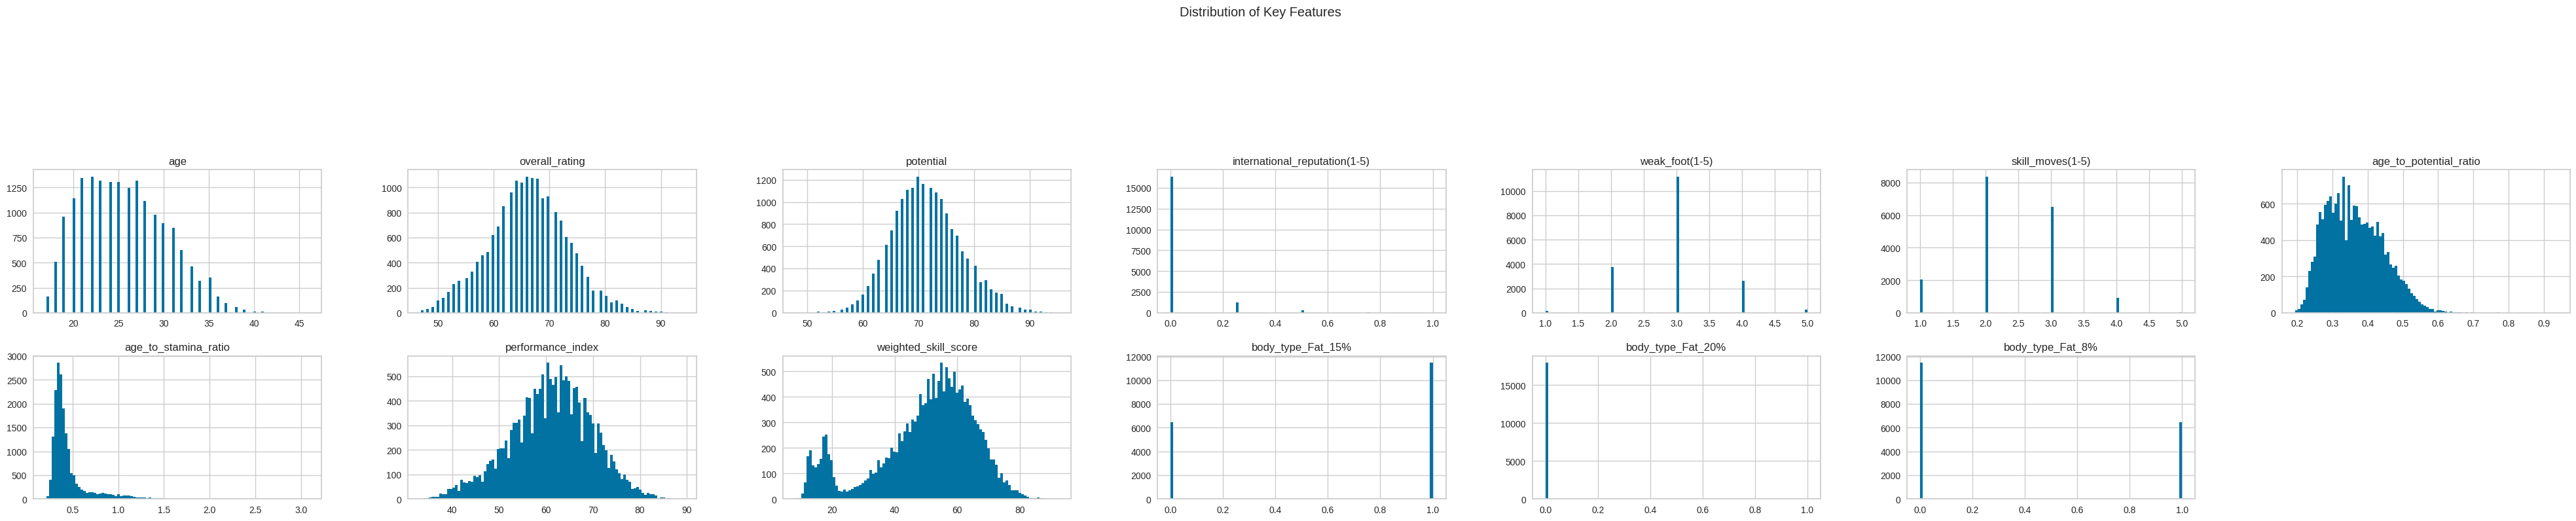

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key numeric features
key_features = ['age', 'overall_rating', 'potential', 'international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score','body_type_Fat_15%',
       'body_type_Fat_20%', 'body_type_Fat_8%']
data[key_features].hist(bins=100, figsize=(50, 25), layout=(7,7))
plt.suptitle("Distribution of Key Features")
plt.show()


Age:

Histogram and density plot of the "age" variable
Shows a roughly normal distribution centered around 35-40 years old

Age_to_potential_ratio:

Scatter plot of an "age to potential ratio" against an unspecified x-axis variable
No clear relationship, points are widely scattered

In [121]:
# Define a list of features (independent variables) for your model
features = ['age', 'overall_rating', 'potential', 'international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score','body_type_Fat_15%',
            'body_type_Fat_20%', 'body_type_Fat_8%']

# Define a list of target variables (dependent variables) for your model
targets = ['value_euro']

# Extract the features from your dataset using the specified feature list
X1 = data[features]

# Extract the target variable from your dataset using the specified target list
y1 = data[targets]

# Split your dataset into training and testing sets for both features and target variable
# The test size is set to 20% of the dataset, and the random state is set for reproducibility
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)



In [122]:
# Instantiate StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
# This computes the mean and standard deviation of the training data
# and scales the training data accordingly
X1_train_scaled = scaler.fit_transform(X1_train)

# Transform the testing data using the scaler fitted to the training data
# This ensures that the testing data is scaled using the same mean and standard deviation as the training data
X1_test_scaled = scaler.transform(X1_test)

In [123]:
# Step 6: Fit Ridge regression model

# Import pandas library
import pandas as pd

# Import train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Import Ridge regression model from sklearn.linear_model module
from sklearn.linear_model import Ridge

# Import StandardScaler from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Set the regularization strength (hyperparameter)
alpha = 1.0

# Instantiate the Ridge regression model with the specified alpha value
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge regression model to the scaled training data
# This step involves learning the relationship between the input features (X1_train_scaled) and the target variable (y1_train)
ridge_model.fit(X1_train_scaled, y1_train)


Ridge()

In [124]:
# Step 7: Interpret the coefficients
coefficients = pd.DataFrame({'Feature': X1.columns, 'Coefficient': ridge_model.coef_.flatten()})
print(coefficients)

                          Feature   Coefficient
0                             age -1.156281e+07
1                  overall_rating  3.959470e+06
2                       potential  3.453124e+06
3   international_reputation(1-5)  2.612506e+06
4                  weak_foot(1-5)  5.808331e+04
5                skill_moves(1-5)  8.144419e+04
6          age_to_potential_ratio  1.128882e+07
7            age_to_stamina_ratio  3.056926e+04
8               performance_index -1.443285e+05
9            weighted_skill_score -8.164348e+04
10              body_type_Fat_15% -8.870481e+03
11              body_type_Fat_20%  1.615985e+05
12               body_type_Fat_8%  6.059704e+03


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [131]:
url = "https://raw.githubusercontent.com/AbhiSingh378/FIFA_Assign/main/fifa.csv"
data2 = pd.read_csv(url)

In [132]:
data2.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [133]:
# Get unique values of the 'body_type' column before cleaning
unique_body_type = data2['body_type'].unique()
print("Before Cleaning the Body_type data, Unique Values are :", unique_body_type)
print()

# Replace specific values in the 'body_type' column to clean the data
data2.replace("Messi", "Fat_15%", inplace=True)  # Replace 'Messi' with 'Fat_15%'
data2.replace("Lean", "Fat_8%", inplace=True)  # Replace 'Lean' with 'Fat_8%'
data2.replace("Normal", "Fat_15%", inplace=True)  # Replace 'Normal' with 'Fat_15%'
data2.replace("Stocky", "Fat_15%", inplace=True)  # Replace 'Stocky' with 'Fat_15%'
data2.replace("Courtois", "Fat_20%", inplace=True)  # Replace 'Courtois' with 'Fat_20%'
data2.replace("PLAYER_BODY_TYPE_25", "Fat_20%", inplace=True)  # Replace 'PLAYER_BODY_TYPE_25' with 'Fat_20%'
data2.replace("Akinfenwa", "Fat_20%", inplace=True)  # Replace 'Akinfenwa' with 'Fat_20%'
data2.replace("Shaqiri", "Fat_15%", inplace=True)  # Replace 'Shaqiri' with 'Fat_15%'
data2.replace("Neymar", "Fat_8%", inplace=True)  # Replace 'Neymar' with 'Fat_8%'
data2.replace("C. Ronaldo", "Fat_8%", inplace=True)  # Replace 'C. Ronaldo' with 'Fat_8%'

# Get unique values of the 'body_type' column after cleaning
unique_body_type = data2['body_type'].unique()
print()
print("After Cleaning the Body_type data, Unique Values are :", unique_body_type)


Before Cleaning the Body_type data, Unique Values are : ['Messi' 'Lean' 'Normal' 'Stocky' 'Courtois' 'PLAYER_BODY_TYPE_25'
 'Akinfenwa' 'Shaqiri' 'Neymar' 'C. Ronaldo']


After Cleaning the Body_type data, Unique Values are : ['Fat_15%' 'Fat_8%' 'Fat_20%']


In [134]:
value_euro_mode = data2['value_euro'].mode()[0]
wage_euro_mode = data2['wage_euro'].mode()[0]

data2['value_euro'].fillna(value_euro_mode, inplace=True)
data2['wage_euro'].fillna(wage_euro_mode,inplace=True)


In [135]:
data2 = pd.get_dummies(data2[['age', 'height_cm', 'weight_kgs',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle']])

# Normalizing the data in the international_reputation(1-5) column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x2 = data2[["international_reputation(1-5)"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x2_scaled = min_max_scaler.fit_transform(x2)

# Run the normalizer on the dataframe
data2[["international_reputation(1-5)"]] = pd.DataFrame(x2_scaled)

In [136]:
data2.head()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,body_type_Fat_15%,body_type_Fat_20%,body_type_Fat_8%
0,31,170.18,72.1,94,94,110500000.0,565000.0,1.00,4,4,...,94,94,75,96,33,28,26,1,0,0
1,27,154.94,76.2,88,89,69500000.0,205000.0,0.50,5,4,...,84,91,67,88,59,57,22,0,0,1
2,25,190.50,83.9,88,91,73000000.0,255000.0,0.75,4,5,...,82,88,82,87,63,67,67,1,0,0
3,27,162.56,59.0,88,88,62000000.0,165000.0,0.50,4,4,...,83,87,61,83,51,24,22,1,0,0
4,27,187.96,88.9,88,91,60000000.0,135000.0,0.50,3,2,...,24,49,33,80,91,88,87,1,0,0


In [137]:
# Feature Engineering
data2['age_to_potential_ratio'] = data2['age'] / data2['potential']
data2['age_to_stamina_ratio'] = data2['age'] / data2['stamina']
data2['performance_index'] = (data2['overall_rating'] + data2['potential'] + data2['composure'] + data2['aggression'] + data2['vision']) / 5

# Skill attributes for Weighted Skill Score
skills = ['dribbling', 'finishing', 'crossing', 'ball_control', 'long_shots', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing']
data2['weighted_skill_score'] = data2[skills].mean(axis=1)

In [138]:
features = ['age', 'overall_rating', 'potential', 'international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score','body_type_Fat_15%',
       'body_type_Fat_20%', 'body_type_Fat_8%']
targets = ['value_euro']

X2 = data2[features]
y2 = data2[targets]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [139]:
print(X2_train.shape)
print(X2_test.shape)

(14363, 13)
(3591, 13)


In [140]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=42)

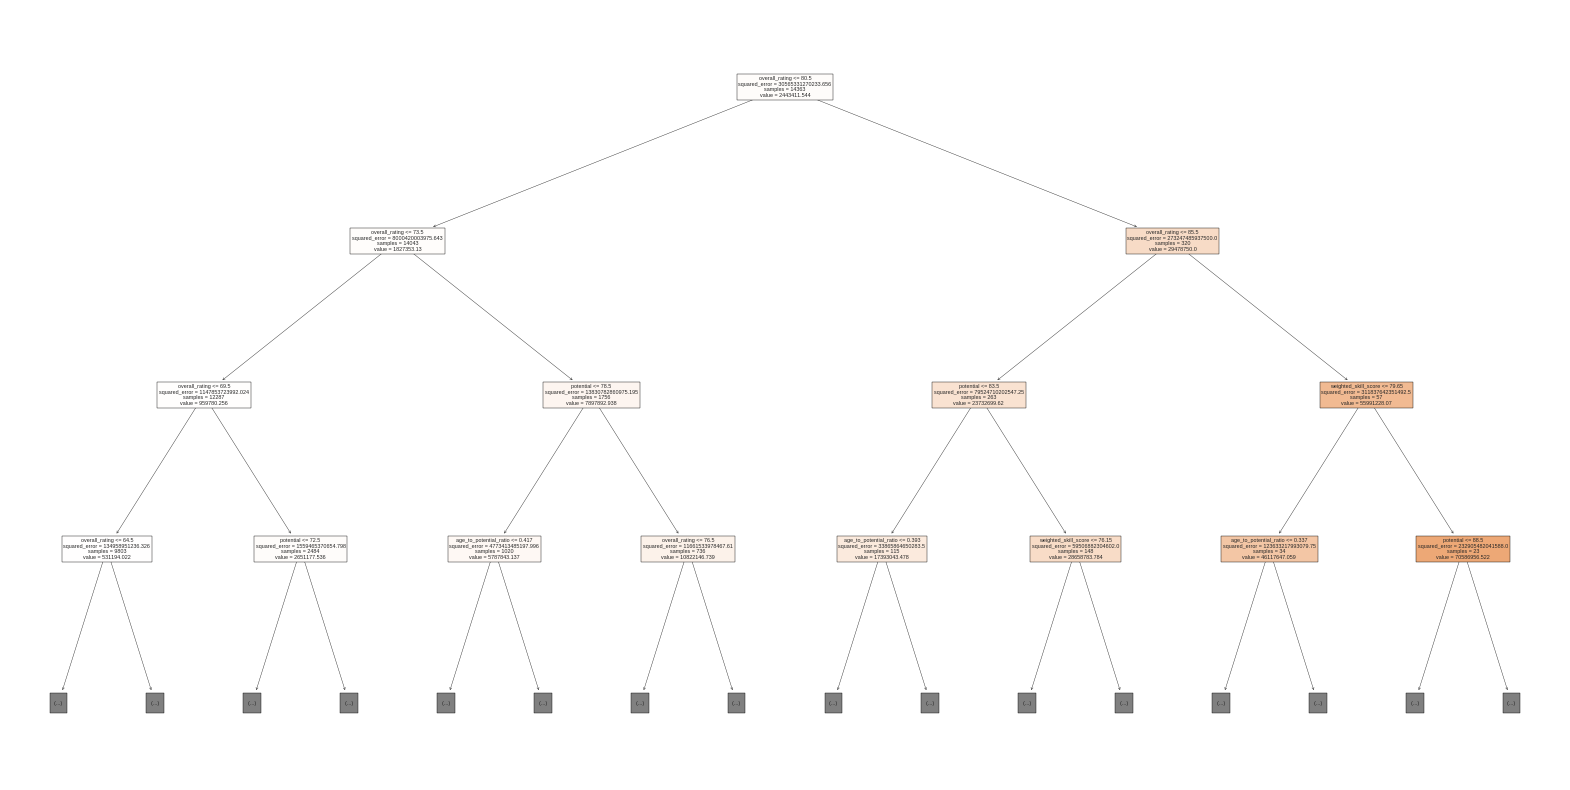

<Figure size 800x550 with 0 Axes>

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X2.columns, max_depth=3)
plt.show()
plt.savefig('decision_tree.png')

The image depicts a hierarchical tree or decision tree structure, likely representing a classification or decision-making process.

At the top of the tree is a single node, which then splits into two branches. Each of these branches further splits into two more branches, and this pattern continues for several levels, creating a symmetrical tree-like structure.

Each node in the tree contains some text, possibly indicating the conditions or criteria used for splitting at that point. However, the text in the image is too small to read clearly.

At the bottom of the tree, there are multiple terminal nodes or leaves, each represented by a small gray square. These terminal nodes likely represent the final outcomes, decisions, or classifications based on the path followed from the root through the various splits.

Decision trees like this are commonly used in machine learning, data mining, and decision analysis to model and visualize complex decision-making processes. The structure allows for a systematic evaluation of conditions and outcomes, with each path from root to leaf representing a unique combination of decisions or attribute values.

Without more context or readable text within the nodes, it's difficult to determine the specific purpose or application of this particular decision tree. However, the overall structure and hierarchy are clear and representative of a typical decision tree diagram.

In [142]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [143]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install yellowbrick

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [144]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
#import warnings warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [145]:
min_mem_size=6
run_time=222

In [146]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [147]:
import random
import logging
import sys
import h2o

# Generate a random port number
port_no = random.randint(5555, 55555)

try:
    # Start H2O cluster
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize H2O cluster: %s', str(e))
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:47384..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpg1s3vy_3
  JVM stdout: /tmp/tmpg1s3vy_3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpg1s3vy_3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:47384
Connecting to H2O server at http://127.0.0.1:47384 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_rv9ogw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [148]:
url = 'https://raw.githubusercontent.com/AbhiSingh378/FIFA_Assign/main/fifadata.csv'
data3 = h2o.import_file(path=url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [149]:
data3.head()

age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
31,170.18,72.1,"CF,RW,ST",Argentina,94,94,1.105e+08,565000,5,4,4,Messi,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26
27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,6.95e+07,205000,3,5,4,Lean,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22
25,190.5,83.9,"CM,CAM",France,88,91,7.3e+07,255000,4,4,5,Normal,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67
27,162.56,59,"LW,ST",Italy,88,88,6.2e+07,165000,3,4,4,Normal,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22
27,187.96,88.9,CB,Senegal,88,91,6e+07,135000,3,3,2,Normal,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87
27,193.04,92.1,CB,Netherlands,88,90,5.95e+07,215000,3,3,2,Normal,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84
20,152.4,73,"RW,ST,RM",France,88,95,8.1e+07,100000,3,4,5,Lean,77,88,77,82,78,90,77,63,73,91,96,96,92,87,83,79,75,83,71,78,62,38,88,82,70,86,34,34,32
30,172.72,69.9,ST,Argentina,89,89,6.45e+07,300000,4,4,4,Stocky,70,93,77,81,85,89,82,73,64,89,88,80,86,90,91,88,81,76,73,83,65,24,92,83,83,90,30,20,12
32,193.04,92.1,GK,Germany,89,89,3.8e+07,130000,5,4,1,Normal,15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,25,77,43,80,16,29,30,12,70,47,70,17,10,11
32,185.42,77.1,ST,Uruguay,89,89,6e+07,200000,4,4,3,Lean,70,89,89,78,90,80,77,76,52,82,75,76,77,91,59,87,88,92,78,79,84,48,93,77,85,82,52,45,39


In [150]:
data3.types

{'age': 'int',
 'height_cm': 'real',
 'weight_kgs': 'real',
 'positions': 'enum',
 'nationality': 'enum',
 'overall_rating': 'int',
 'potential': 'int',
 'value_euro': 'int',
 'wage_euro': 'int',
 'international_reputation(1-5)': 'int',
 'weak_foot(1-5)': 'int',
 'skill_moves(1-5)': 'int',
 'body_type': 'enum',
 'crossing': 'int',
 'finishing': 'int',
 'heading_accuracy': 'int',
 'short_passing': 'int',
 'volleys': 'int',
 'dribbling': 'int',
 'curve': 'int',
 'freekick_accuracy': 'int',
 'long_passing': 'int',
 'ball_control': 'int',
 'acceleration': 'int',
 'sprint_speed': 'int',
 'agility': 'int',
 'reactions': 'int',
 'balance': 'int',
 'shot_power': 'int',
 'jumping': 'int',
 'stamina': 'int',
 'strength': 'int',
 'long_shots': 'int',
 'aggression': 'int',
 'interceptions': 'int',
 'positioning': 'int',
 'vision': 'int',
 'penalties': 'int',
 'composure': 'int',
 'marking': 'int',
 'standing_tackle': 'int',
 'sliding_tackle': 'int'}

In [151]:
def count_null_values(data3):

    # Check for missing values in each column
    missing_values_count = data3.nacnt()

    # Create a dictionary to store column names and their corresponding null value counts
    null_values_dict = {}

    # Iterate through the columns of the H2OFrame
    for i, col_name in enumerate(data3.columns):
        null_values_dict[col_name] = missing_values_count[i]

    return null_values_dict
# Call the function and pass your H2OFrame as an argument
null_values_count = count_null_values(data3)

# Print the dictionary containing null value counts for each column
for key,value in null_values_count.items():
  print("{} : {}.".format(key.capitalize(), int(value)))

Age : 0.
Height_cm : 0.
Weight_kgs : 0.
Positions : 0.
Nationality : 0.
Overall_rating : 0.
Potential : 0.
Value_euro : 0.
Wage_euro : 0.
International_reputation(1-5) : 0.
Weak_foot(1-5) : 0.
Skill_moves(1-5) : 0.
Body_type : 0.
Crossing : 0.
Finishing : 0.
Heading_accuracy : 0.
Short_passing : 0.
Volleys : 0.
Dribbling : 0.
Curve : 0.
Freekick_accuracy : 0.
Long_passing : 0.
Ball_control : 0.
Acceleration : 0.
Sprint_speed : 0.
Agility : 0.
Reactions : 0.
Balance : 0.
Shot_power : 0.
Jumping : 0.
Stamina : 0.
Strength : 0.
Long_shots : 0.
Aggression : 0.
Interceptions : 0.
Positioning : 0.
Vision : 0.
Penalties : 0.
Composure : 0.
Marking : 0.
Standing_tackle : 0.
Sliding_tackle : 0.


In [152]:
# Define the replacement mapping
replacement_mapping = {
    "Messi": "Fat_15%",
    "Lean": "Fat_8%",
    "Normal": "Fat_15%",
    "Stocky": "Fat_15%",
    "Courtois": "Fat_20%",
    "PLAYER_BODY_TYPE_25": "Fat_20%",
    "Akinfenwa": "Fat_20%",
    "Shaqiri": "Fat_15%",
    "Neymar": "Fat_8%",
    "C. Ronaldo": "Fat_8%"
}

# Perform replacements using H2O's Python API
for old_val, new_val in replacement_mapping.items():
    data3['body_type'] = (data3['body_type'] == old_val).ifelse(new_val, data3['body_type'])

# Check unique values after replacement
unique_body_type = data3['body_type'].unique()
print("After Cleaning the Body_type data, Unique Values are :", unique_body_type)


After Cleaning the Body_type data, Unique Values are : C1
Fat_15%
Fat_20%
Fat_8%
[3 rows x 1 column]



In [153]:
# Feature Engineering
data3['age_to_potential_ratio'] = data3['age'] / data3['potential']
data3['age_to_stamina_ratio'] = data3['age'] / data3['stamina']
data3['performance_index'] = (data3['overall_rating'] + data3['potential'] + data3['composure'] + data3['aggression'] + data3['vision']) / 5

# Skill attributes for Weighted Skill Score
skills = ['dribbling', 'finishing', 'crossing', 'ball_control', 'long_shots', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing']
mean_skills = data3[skills].mean(na_rm=True)

# Calculate the average of the mean values
average_mean_skill = sum(mean_skills) / len(mean_skills)

# Assign the average mean value to the new column 'weighted_skill_score'
data3['weighted_skill_score'] = average_mean_skill

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:3049: H2ODeprecationWarning: Parameter na_rm is deprecated; use skipna instead
  warnings.warn("Parameter na_rm is deprecated; use skipna instead", category=H2ODeprecationWarning)


In [154]:
show_data=data3[['age', 'overall_rating', 'potential','value_euro','wage_euro','international_reputation(1-5)',
            'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio','age_to_stamina_ratio',
            'performance_index', 'weighted_skill_score']]


In [155]:
columns = list(show_data.columns)
print(columns)

['age', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [156]:
show_data.describe()

Rows:17954
Cols:12

,age,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),age_to_potential_ratio,age_to_stamina_ratio,performance_index,weighted_skill_score
type,int,int,int,int,int,int,int,int,real,real,real,real
mins,17.0,47.0,48.0,10000.0,1000.0,1.0,1.0,1.0,0.19318181818181818,0.2125,33.4,49.918920574802264
mean,25.565445026178004,66.24016932159964,71.43093461067171,2454009.1344547174,9807.563774089333,1.111674278712264,2.9456945527459064,2.36103375292414,0.362014789730754,0.4488120889293412,61.1148156399688,49.91892057480227
maxs,46.0,94.0,95.0,110500000.0,565000.0,5.0,5.0,5.0,0.9375,3.0833333333333335,89.2,49.918920574802264
sigma,4.705707854152863,6.963729787322413,6.131339100237621,5650404.856928989,21859.109089548856,0.3921678684017022,0.663691488290801,0.7632225947263014,0.08066824500608898,0.21896914136230425,8.560520613578385,4.347682918055948e-15
zeros,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,31.0,94.0,94.0,110500000.0,565000.0,5.0,4.0,4.0,0.32978723404255317,0.4305555555555556,85.2,49.918920574802264
1,27.0,88.0,89.0,69500000.0,205000.0,3.0,5.0,4.0,0.30337078651685395,0.29347826086956524,80.4,49.918920574802264
2,25.0,88.0,91.0,73000000.0,255000.0,4.0,4.0,5.0,0.27472527472527475,0.2840909090909091,86.4,49.918920574802264


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


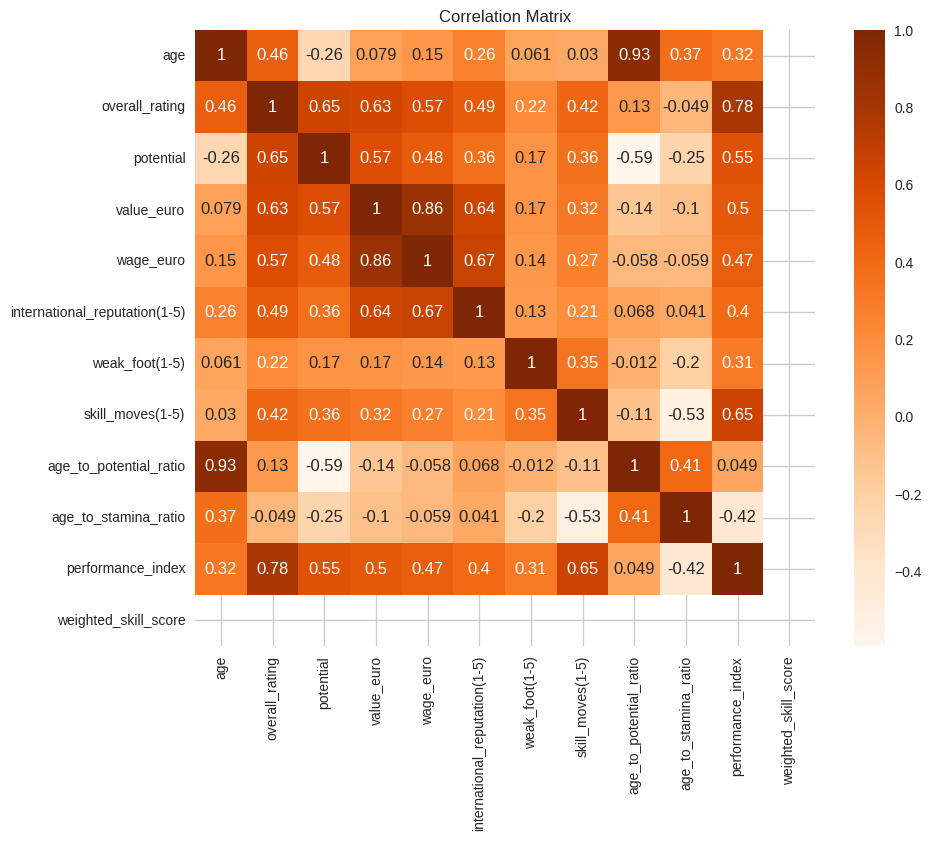

In [157]:
# import seaborn as sns
# sns.heatmap(
#     data.corr(), annot=True, cmap="Oranges"
# )  # Heatmap showing correlation between the attributes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert H2OFrame to pandas DataFrame
data_pd = show_data.as_data_frame()

# Calculate correlation matrix
corr_matrix = data_pd.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Oranges")
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis

* Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

* We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

* The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

* A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

**From the Above Matrix we can conclude a few things**

Age and Age_to_potential_ratio is highly correlated
overall_rating and performance_index is highly correlated

In [158]:
data_df = h2o.H2OFrame(
    data_pd
)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [159]:
data_df.shape

(17954, 12)

In [160]:
# Create a 80/20 train/test split
split_rows=0.80
data_train, data_test = data_df.split_frame([split_rows])

In [161]:
print(data_train.shape)
print(data_test.shape)

(14427, 12)
(3527, 12)


In [162]:
#Display all columns in X
X3=data_df.columns
print(X3)

['age', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [163]:
y3 ='value_euro'
X3.remove(y3)
print(X3)

['age', 'overall_rating', 'potential', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'age_to_potential_ratio', 'age_to_stamina_ratio', 'performance_index', 'weighted_skill_score']


In [164]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [165]:
#pass the data through H20AutoML
aml.train(x=X3,y=y3,training_frame=data_train)

AutoML progress: |
03:51:41.114: _train param, Dropping bad and constant columns: [weighted_skill_score]

█████████
03:52:10.430: _train param, Dropping bad and constant columns: [weighted_skill_score]

█
03:52:14.208: _train param, Dropping bad and constant columns: [weighted_skill_score]

████████████
03:52:58.683: _train param, Dropping unused columns: [weighted_skill_score]

█
03:53:00.54: _train param, Dropping bad and constant columns: [weighted_skill_score]

████
03:53:16.270: _train param, Dropping bad and constant columns: [weighted_skill_score]

██████
03:53:38.48: _train param, Dropping bad and constant columns: [weighted_skill_score]

████
03:53:51.756: _train param, Dropping bad and constant columns: [weighted_skill_score]

███
03:54:03.898: _train param, Dropping bad and constant columns: [weighted_skill_score]

█████
03:54:20.200: _train param, Dropping unused columns: [weighted_skill_score]
03:54:20.939: _train param, Dropping unused columns: [weighted_skill_score]


03

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/12
# GBM base models (used / total),2/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [166]:
print(aml.leaderboard)

model_id                                                  rmse          mse     mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20240318_35140     769288  5.91804e+11  214964      nan               5.91804e+11
StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_35140  783244  6.13471e+11  216556      nan               6.13471e+11
StackedEnsemble_AllModels_1_AutoML_1_20240318_35140     787940  6.20849e+11  213996      nan               6.20849e+11
StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_35140  792018  6.27292e+11  218294      nan               6.27292e+11
GBM_4_AutoML_1_20240318_35140                           813269  6.61407e+11  225012      nan               6.61407e+11
XGBoost_2_AutoML_1_20240318_35140                       828542  6.86482e+11  237209      nan               6.86482e+11
GBM_2_AutoML_1_20240318_35140                           831482  6.91363e+11  233699      nan               6.91363e+11
XGBoost_grid_1_AutoML_1_20240318_35140_model_1  

In [167]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_2_AutoML_1_20240318_35140': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_35140': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20240318_35140': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_35140': 3,
 'GBM_4_AutoML_1_20240318_35140': 4,
 'GLM_1_AutoML_1_20240318_35140': 20}

In [168]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

4


In [169]:
best_model.algo

'gbm'

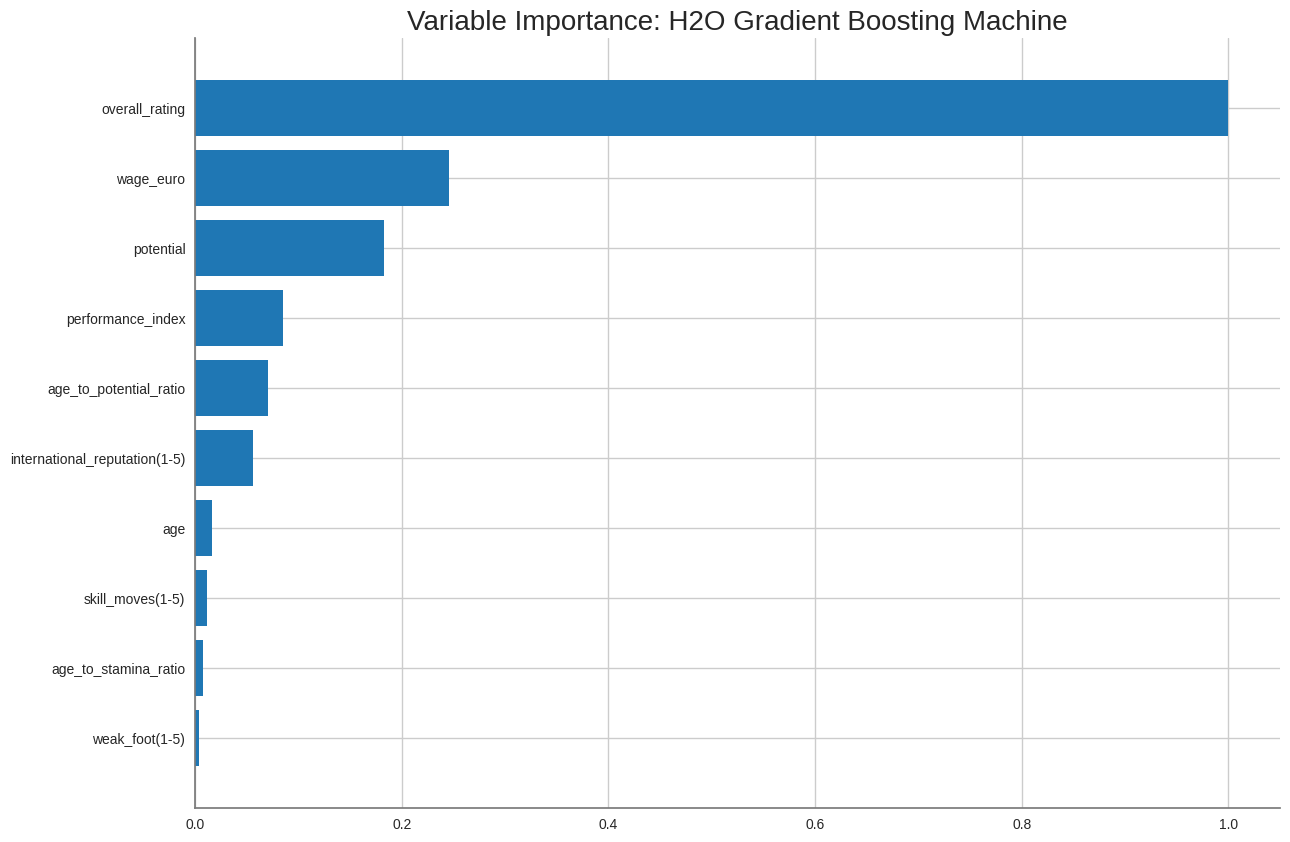

<Figure size 800x550 with 0 Axes>

In [170]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-171-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


20
glm


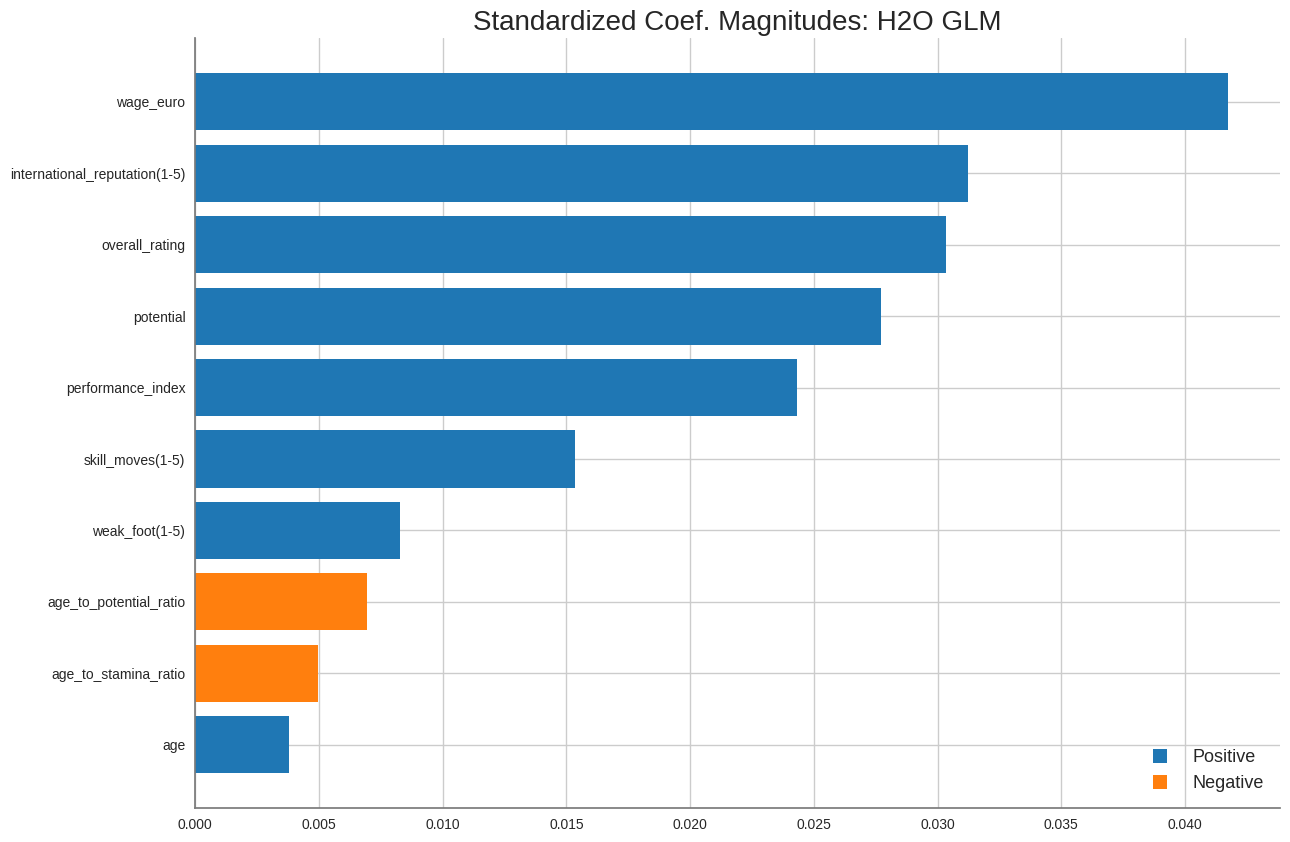

In [171]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [172]:
print(best_model.rmse(train=True))

378537.7027461826


In [173]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [174]:
mod_perf = best_model.model_performance(data_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 525457451345.5929,
 'rmse': 724884.4399941227,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN'}

In [175]:
predictions = best_model.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [176]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

           predict
0     5.777452e+07
1     7.168437e+07
2     5.635923e+07
3     4.589210e+07
4     5.516351e+07
...            ...
3522  8.290604e+07
3523  7.373434e+07
3524  8.971958e+07
3525  8.112109e+05
3526  1.724040e+05

[3527 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [177]:
y_test = h2o.as_list(data_test[y3])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,value_euro
0,60000000
1,78000000
2,53500000
3,38000000
4,51500000
...,...
3522,76500000
3523,72000000
3524,77000000
3525,825000


In [ ]:
!pip install shap

In [ ]:
print(X1_train_scaled.shape)
print(X1_test_scaled.shape)

(14363, 13)
(3591, 13)


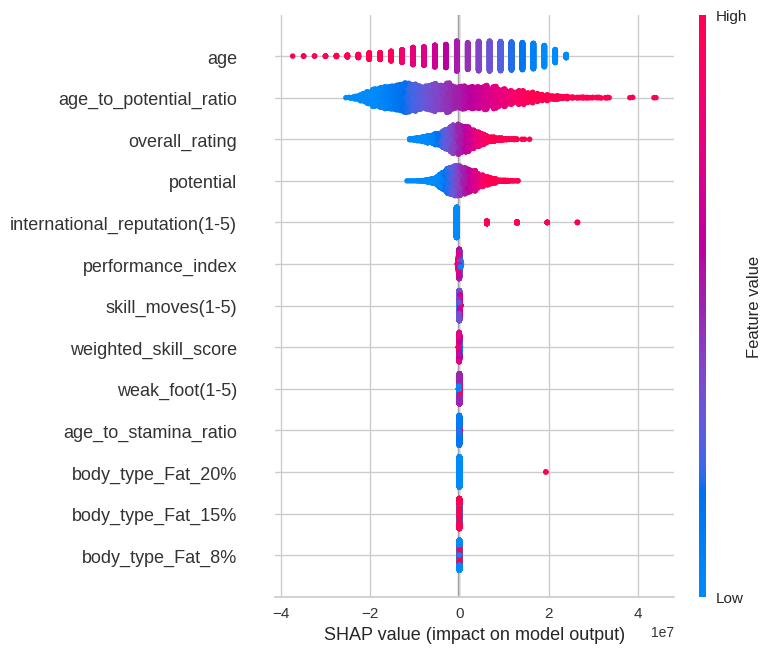

In [ ]:
# Step 4: SHAP analysis on Ridge regression model
import shap
import pandas as pd

# Convert the NumPy arrays to pandas data frames
X_train_pd = pd.DataFrame(X1_train_scaled, columns=X1.columns)
X_test_pd = pd.DataFrame(X1_test_scaled, columns=X1.columns)

# Initialize the explainer object for Ridge regression model
explainer_ridge = shap.Explainer(ridge_model, X_train_pd)

# Calculate SHAP values for test data
shap_values_ridge = explainer_ridge(X_test_pd)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values_ridge, X_test_pd, feature_names=X1.columns)


The provided image is a SHAP (SHapley Additive exPlanations) summary plot, which visualizes the importance and impact of different features on the predictions made by a machine learning model, likely a Ridge regression model based on the code snippet.

Key observations from the plot:

1. Feature importance: The y-axis lists the features in descending order of their overall importance in the model's predictions. "age" appears to be the most important feature, followed by "age_to_potential_ratio", "overall_rating", and so on.

2. Impact on prediction: The x-axis represents the SHAP value, which indicates how much each feature contributes to the model's prediction for a given instance. Positive SHAP values (to the right) mean the feature pushes the prediction higher, while negative values (to the left) mean the feature lowers the prediction.

3. Feature value: The color coding of the dots represents the actual value of the feature for each instance. Red dots indicate high feature values, while blue dots indicate low values. This allows us to see how the value of a feature relates to its impact on the prediction.

4. Density: The thickness of the point cloud for each feature shows the density of instances with similar SHAP values. Thicker areas represent a higher concentration of instances.

Some specific insights:

- Higher "age" values (red dots) have a strong positive impact on the prediction, while lower values (blue dots) have a negative impact.
- "age_to_potential_ratio" and "overall_rating" show a mix of positive and negative impacts, suggesting a more complex relationship with the target variable.
- Features like "weak_foot(1-5)" and "weighted_skill_score" have relatively lower importance and a narrower range of SHAP values, indicating they have a smaller impact on the model's predictions.

Overall, the SHAP summary plot provides a global interpretation of the model, showing which features are most influential and how their values relate to the model's output. This can help in understanding the model's behavior, identifying important variables, and making informed decisions based on the model's predictions.

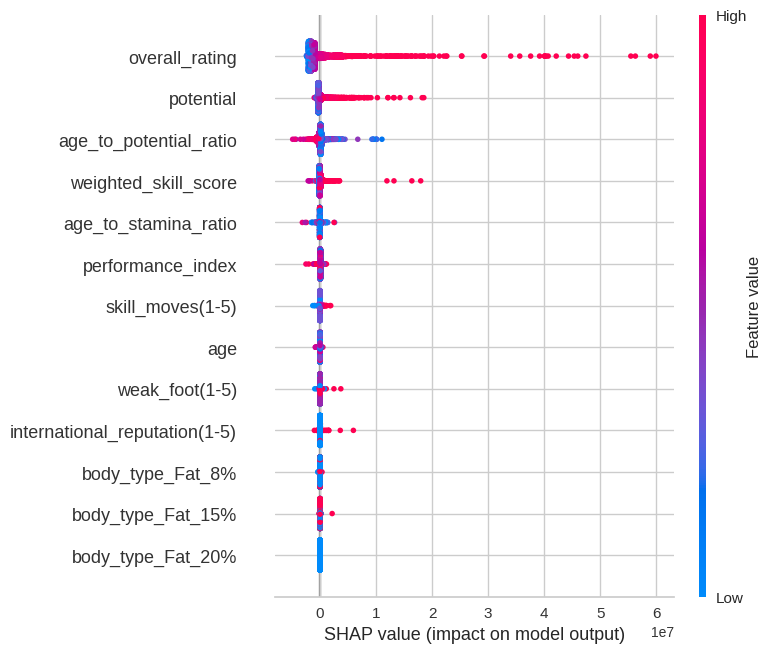

In [93]:
import shap

X_train_pd = pd.DataFrame(X2_train, columns=X2.columns)
X_test_pd = pd.DataFrame(X2_test, columns=X2.columns)

# Step 7: SHAP analysis on decision tree model
# Initialize the explainer object for the decision tree model
explainer = shap.Explainer(tree_model, X2_train)


# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_pd, check_additivity=False)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test_pd)

The graph is a SHAP (SHapley Additive exPlanations) summary plot, which is used to interpret the impact and importance of different features on a machine learning model's predictions. The plot provides a global overview of the model's behavior by showing the average impact of each feature on the model's output.

Key components and interpretations of the plot:

1. Feature importance: The features are listed on the y-axis in descending order of their overall importance. The feature at the top (overall_rating) has the highest impact on the model's predictions, while the feature at the bottom (weak_foot(1-5)) has the least impact.

2. SHAP values: The horizontal axis represents the SHAP values, which indicate the impact of each feature on the model's output. Features with SHAP values further away from zero (either positive or negative) have a greater impact on the predictions.

3. Dot color: The color of each dot represents the value of the corresponding feature for a particular data point. Red dots indicate high feature values, while blue dots indicate low feature values.

4. Dot position: The position of a dot on the x-axis (SHAP value) shows the impact of that feature value on the model's prediction for a specific instance. Dots to the right (positive SHAP values) indicate that the feature value contributes positively to the prediction, while dots to the left (negative SHAP values) indicate a negative contribution.

5. Feature value distribution: The spread of dots for each feature gives an idea of the distribution of feature values in the dataset. A wide spread suggests a diverse range of values, while a narrow spread indicates a more concentrated distribution.

Interpreting the plot, we can conclude that:
- Overall_rating and potential are the most important features, with a significant impact on the model's predictions.
- High values of overall_rating, potential, and weighted_skill_score generally contribute positively to the predictions, while low values contribute negatively.
- Features like age and weak_foot(1-5) have a relatively smaller impact on the model's predictions compared to the top features.

This plot helps in understanding the global feature importance and how different feature values influence the model's predictions, providing valuable insights into the model's behavior and the underlying data.

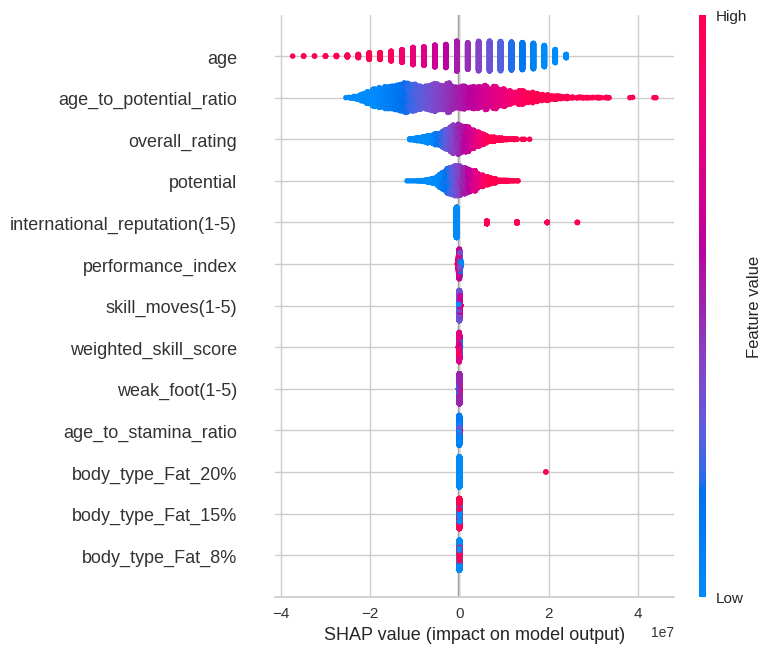

In [105]:
# Step 6: SHAP analysis on TPOT best model
# Convert the H2O data frames to pandas data frames
X_train_pd = data_train.as_data_frame()
X_test_pd = data_test.as_data_frame()

# Initialize the explainer object for TPOT best model

explainer_tpot = shap.Explainer(best_model, X_train_pd)

# Calculate SHAP values for test data
shap_values_tpot = explainer_tpot(X_test_pd)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values_tpot, X_test_pd, feature_names=X3.columns)


The graph is a SHAP (SHapley Additive exPlanations) summary plot, which provides an overview of the feature importance and the impact of different feature values on the predictions of the best model obtained from TPOT (Tree-Based Pipeline Optimization Tool).

Key components and interpretations of the plot:

1. Feature importance: The features are listed on the y-axis in descending order of their overall importance. The feature at the top (age) has the highest impact on the model's predictions, while the feature at the bottom (weak_foot(1-5)) has the least impact among the displayed features.

2. SHAP values: The horizontal axis represents the SHAP values, which indicate the impact of each feature on the model's output. Features with SHAP values further away from zero (either positive or negative) have a greater impact on the predictions.

3. Dot color: The color of each dot represents the value of the corresponding feature for a particular data point. Red dots indicate high feature values, while blue dots indicate low feature values.

4. Dot position: The position of a dot on the x-axis (SHAP value) shows the impact of that feature value on the model's prediction for a specific instance. Dots to the right (positive SHAP values) indicate that the feature value contributes positively to the prediction, while dots to the left (negative SHAP values) indicate a negative contribution.

5. Feature value distribution: The spread of dots for each feature gives an idea of the distribution of feature values in the dataset. A wide spread suggests a diverse range of values, while a narrow spread indicates a more concentrated distribution.

Interpreting the plot, we can conclude that:
- Age is the most important feature, with a significant impact on the model's predictions. Higher age values tend to contribute positively to the predictions, while lower age values contribute negatively.
- Age_to_potential_ratio, overall_rating, and potential are also important features, with a notable impact on the model's predictions.
- Features like international_reputation(1-5), performance_index, and skill_moves(1-5) have a relatively smaller impact compared to the top features but still contribute to the model's predictions.
- The distribution of dots for each feature provides insights into the range and concentration of feature values in the dataset.

This SHAP summary plot helps in understanding the global feature importance and how different feature values influence the TPOT best model's predictions. It provides valuable insights into the model's behavior and the underlying data, allowing for better interpretation and decision-making based on the model's outputs.

###MIT License

Copyright (c) 2024 AbhiSingh378

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#References

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/code/avigaharwar/fifa-player-rating-predictor/

Shap Analysis- https://shap.readthedocs.io/en/latest/

Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML
